## **Data Challenge** :  Wine tasting competition

*Solal Danan / sol-dnn*

*Gaspard Blaise / gaspardblaise*

*Lucas Aljancic / lucasaljc*

*Vincent Lagarde / vincent-lagarde*

*Gregoire Mourre / gregoiremrr*

*Marceau Leclerc / marssoo*

Oenology, the science and study of wine, is a field that combines tradition, expertise, and sensory analysis. France is a global leader in wine production and represents a tenth of world production. Moreover, the wine industry represents nearly 450,000 jobs in France. Renowned for its historic terroirs, exceptional wines, and culinary artistry, France is also celebrated for its mastery of sommelier expertise.



<div style="display: flex; justify-content: center;">
    <img src="img/4.jpg" alt="Image 3" style="width:30%">
</div>

Each year, wine enlightened enthusiasts and professional sommeliers compete in blind tasting competitions, where the goal is to identify key characteristics of a wine, such as its region, sub-region, grape variety, appellation, vintage, and even the estate. Participants rely on their extensive knowledge and sensory training to evaluate attributes like acidity, bitterness, tannins, color intensity, texture, and aromatic markers. For instance, a wine with pronounced lemon and hydrocarbon aromas, coupled with high acidity, is likely a Riesling from Alsace.


<div style="display: flex; justify-content: center;">
    <img src="img/3.jpg" alt="Image 3" style="width:40%">
    <img src="img/6.jpg" alt="Image 3" style="width:40%">
</div>

Inspired by this tradition, we present a Data Challenge that bridges the worlds of oenology and data science. The objective is to train a model capable of predicting the origin of a wine based on its characteristics. Using [Vivino](Vivino.com), a popular app where wine enthusiasts rate and review wines, participants will analyze various features and tasting notes to classify wines by region. This challenge is a classification problem, where the goal is to accurately determine the wine's origin.

## **DATASET PRESENTATION**

The data was obtained scraping a variety of page types on the [vivino website](vivino.com). Here is an overview of the process we went through to obtain the final dataset :
- First we selected regions of interest, that would end up being our classes, such as Bourgogne. 
- For each of these regions, we scrapped all the wines we could, ending up with a file containing URLs to 9838 wine pages.
- For each of these wine pages, we scrapped all its reviews, including the comment and other relevant information such as the number of likes, if available. We also saved the URLs of the profile providing the comment.
- Using the profiles' URLs, we scrapped other relevant informations regarding the reviewers, such as their rankings and bumber of followers.
- We merged all this information in a single `.tsv` file that can be loaded as below.

The scrapping proved to be tough, requiring a total of 3 main scrapping scripts (one for every step). It was done using selenium in an under-optimized way at first (to scrap the wines and their reviews, which took about 12 hours using 2 computers). Later on when scrapping the users' profiles we encountered a new difficulty, our IP adresses being blocked very quickly after a hundred requests. As a results, we reworked our last scrapping script to detect when we get blocked, in order to trigger a rotation in IP adress using a VPN. This last leg was also run on 2 laptops, under 8 hours total.

As a result of these difficulties and in addition to our scripts relying on computer-specific parameters (resolution for scrolling, for instance) and on manual merging of the data, we prefered not to include the code that was used to scrap this data. It has to be stressed however that all the data provided here is indeed public.

In the end, we provide a dataset comprising 100,686 reviews on a total of 9838 wines.

In [14]:
import pandas as pd

# Read the tsv file
data = pd.read_csv('data/data_vivino.tsv', delimiter='\t')
data.head()

,region,wine_id,rating,vintage,comment,user,publication_date,likes,URL,Name,Country,Notes,Ranking in PT,Followers,Following
0,Bordeaux,1,5.0,2011.0,adore this wine. full. smoky but with less ear...,Sean Howell (540 ratings),"Feb 6, 2018",3.0,https://www.vivino.com/users/sean-howe,Sean Howell,NaN,540.0,17249.0,63,172
1,Bordeaux,1,4.5,2011.0,interesting introduction to this wine. earthy ...,Sam Ong (402 ratings),"Nov 2, 2017",6.0,https://www.vivino.com/users/m5fcd464729e44ae9...,Sam Ong,Philippines,402.0,0.0,43,17
2,Bordeaux,1,4.0,NaN,"XXX high acidity , dark colors hints of black ...",Sherief Nazif (555 ratings),"Jan 8, 2023",2.0,https://www.vivino.com/users/sherief.nazif,Sherief Nazif,Egypt,596.0,2.0,32,10
3,Bordeaux,1,4.5,2011.0,the perfect XXX,Winter (178 ratings),"Oct 26, 2022",0.0,https://www.vivino.com/users/wonbeen.kim,Winter,France,178.0,0.0,0,0
4,Bordeaux,1,5.0,2011.0,"full bodied, rich, smooth",Mimi Cheng (211 ratings),"Sep 4, 2017",0.0,https://www.vivino.com/users/mimi.chen,Mimi Cheng,NaN,212.0,42985.0,3,1


### **Features Overview**

Each row in the dataset corresponds to a wine review on Vivino. Below is a detailed description of the columns:

- **region**: This is the target variable we aim to predict. There are 11 distinct regions in the dataset, each with varying occurrence frequencies.

- **wine_id**: This column uniquely identifies a wine. Multiple rows may refer to the same wine if it has received multiple reviews from different users.

- **rating**: This is a user-assigned rating on a 5-point scale. A score of 5 indicates that the user highly enjoyed the wine.

- **vintage**: This represents the vintage of the wine, i.e., the year the grapes were harvested to produce the wine.

- **comment**: This is the user's review of the wine. Any information directly referencing a region has been censored. However, the comments may still contain valuable insights about the wine's characteristics that can help deduce its region.

- **user**: This refers to the Vivino user profile of the individual who left the review.

- **publication_date**: The date when the review was published.

- **likes**: The number of likes the review received from other Vivino users.

- **URL**: The full review page can be accessed via this URL.

- **Name**: The username of the Vivino user who left the review.

- **Country**: The country of the Vivino user.

- **Notes**: The total number of reviews the user has made on Vivino, reflecting their experience on the platform.

- **Ranking in PT**: The user's ranking as provided by Vivino.

- **Followers**: The number of followers the user has.

- **Following**: The number of users the user is following.

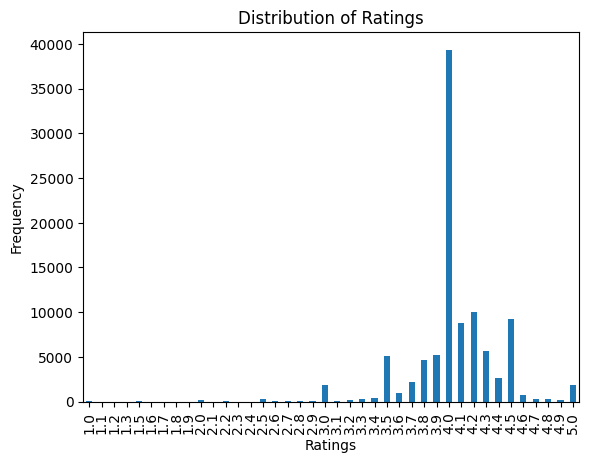

In [2]:
import matplotlib.pyplot as plt
# Distribution of ratings
data.rating.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

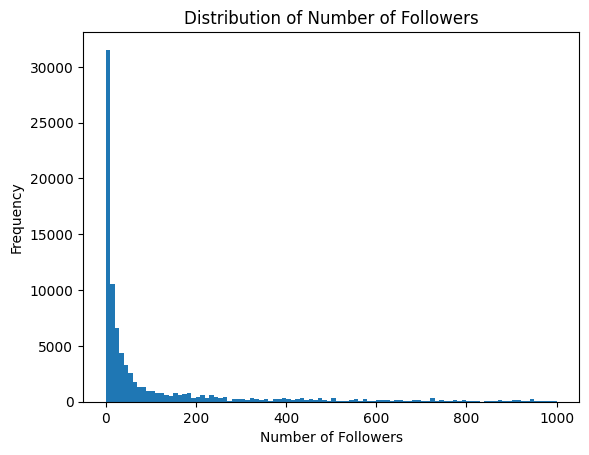

In [3]:
# Distribution of followers
plt.hist(data['Followers'], bins=100, range=(0, 1000))
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Followers')
plt.show()

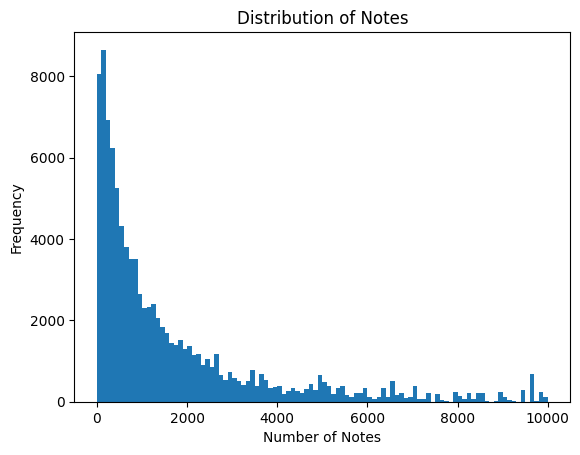

In [4]:
# Distribution of Notes
plt.hist(data['Notes'], bins=100, range=(0, 10000))
plt.xlabel('Number of Notes')
plt.ylabel('Frequency')
plt.title('Distribution of Notes')
plt.show()

## Important feature : Tasting comments

In [5]:
df_comments = pd.DataFrame(data["comment"], columns=["comment"])
pd.set_option('display.max_colwidth', None)
df_comments.head()


,comment
0,fantastic XXX perfumed nose typically XXX XXX notes of lychees tropical fruit and honeycomb. medium plus acidity long fruity sweet finish
1,"sweet succulent honey nose. palate is sweet, as expected with peach honey pear lychee. excellent wine"
2,"floral notes, lime, citrus, fairly sweet and light, enjoyable fresh and easy drinking"
3,we love this. a family fave
4,"excellent wine. i said 4, 'er indoors said '4 or more' hence 4.1. the wine list in the restaurant where we had it (sabai sabai) said 'lychee, rose, pepper'. completely agree, whilst clarifying 'pepper' as 'white' and adding a touch of lime; almost like a weak (in a good wXXX) margarita. great with thai food."


## Target : Predict the region (11 classes)

In [6]:
# Display the contents of the dataframe
data["region"].value_counts()

region
Bordeaux                33028
Bourgogne               15723
Vallee du Rhone         13126
Languedoc-Roussillon    11648
Vallee de la Loire       9946
Alsace                   5137
Champagne                3779
Provence                 3664
Sud Ouest                3506
Corse                     669
Savoie                    460
Name: count, dtype: int64

## **EVALUATION METRIC**

# Balanced Accuracy Score - `scikit-learn`

# Definition  
The **Balanced Accuracy Score** is a metric used to evaluate classification models, particularly when dealing with **imbalanced classes**. It is defined as the average of the **recall per class** over all classes.

# Formula  
For a multi-class classification problem with $C$ classes and its corresponding confusion matrix, the **Balanced Accuracy** is given by:

$$
\text{Balanced Accuracy} = \frac{1}{C} \sum_{i=1}^{C} \frac{\text{TP}_i}{\text{TP}_i + \text{FN}_i}
$$

where:  
- $ \text{TP}_i $ (True Positives) is the number of correctly classified instances of class $ i $.
- $ \text{FN}_i $ (False Negatives) is the number of instances of class $i $ misclassified into another class.


# Comparison with Standard Accuracy  
Unlike **regular accuracy**, which can be misleading in the presence of imbalanced data, **Balanced Accuracy** ensures that each class contributes equally to the final score.

# Implementation in `scikit-learn`  
In Python, you can compute this metric using `balanced_accuracy_score`:

```python
from sklearn.metrics import balanced_accuracy_score

y_true = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
y_pred = [0, 1, 0, 0, 1, 1, 1, 0, 1, 1]

score = balanced_accuracy_score(y_true, y_pred)
print(f"Balanced Accuracy: {score:.4f}")


## **BASELINE**

In [7]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding Regions

In [8]:
label_encoder = LabelEncoder()
data["region_encoded"] = label_encoder.fit_transform(data["region"])

# Data split

In [9]:
X = data.drop(columns=["region", "region_encoded"])
y = data["region_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model 1 : Random proportional model

In [10]:
# Calculate classes proportions on y_train
unique_classes, class_counts = np.unique(y_train, return_counts=True)
class_proportions = class_counts / len(y_train)

# Generate random predictions w.r.t the proportions
y_pred_weighted_random = np.random.choice(unique_classes, size=len(y_test), p=class_proportions)

# Evatuation (Balanced Accuracy)
balanced_acc_weighted_random = balanced_accuracy_score(y_test, y_pred_weighted_random)
print(balanced_acc_weighted_random)

0.09229913160576513


# Model 2 : We predict the most frequent region only

In [11]:
from collections import Counter

# Modèle basé sur la région la plus fréquente
most_common_region = Counter(y_train).most_common(1)[0][0]
y_pred_most_frequent = np.full_like(y_test, most_common_region)

# Évaluation (Balanced Accuracy)
balanced_acc_most_frequent = balanced_accuracy_score(y_test, y_pred_most_frequent)

# Affichage des résultats
print(balanced_acc_most_frequent)

0.09090909090909091


# Model 3 : Using comments

In [12]:
# Réimportation des bibliothèques après la réinitialisation de l'état
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import balanced_accuracy_score
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# Vérification de l'utilisation du GPU
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Chargement et préparation des données
np.random.seed(42)

data = pd.read_csv("data_vivino.tsv", sep="\t")
#data = data.sample(n=10000, random_state=42)
data = data.drop(columns=["Unnamed: 0"], errors="ignore")

# Encodage des régions
label_encoder = LabelEncoder()
data["region_encoded"] = label_encoder.fit_transform(data["region"])
data["comment"] = data["comment"].fillna("")

# Séparer les données en train, val et test
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data["comment"].tolist(), data["region_encoded"].tolist(), test_size=0.2, random_state=42)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts, train_labels, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

/Users/lucasaljancic/Documents/Master Data/Optimal_trading/optimal_trading/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### TF-IDF + Logistic Regression

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
clf = LogisticRegression(max_iter=1000)

pipeline = Pipeline([("tfidf", vectorizer), ("clf", clf)])
pipeline.fit(train_texts, train_labels)

preds = pipeline.predict(test_texts)
balanced_acc_tfidf = balanced_accuracy_score(test_labels, preds)
print(f"TF-IDF + Logistic Regression Balanced Accuracy: {balanced_acc_tfidf:.4f}")


TF-IDF + Logistic Regression Balanced Accuracy: 0.3572


### TF-IDF + Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
rf_clf = RandomForestClassifier(n_estimators=100)
pipeline_rf = Pipeline([("tfidf", vectorizer), ("clf", rf_clf)])
pipeline_rf.fit(train_texts, train_labels)

preds_rf = pipeline_rf.predict(test_texts)
balanced_acc_rf = balanced_accuracy_score(test_labels, preds_rf)
print(f"TF-IDF + Random Forest Balanced Accuracy: {balanced_acc_rf:.4f}")


TF-IDF + Random Forest Balanced Accuracy: 0.4670


### BERT 

In [15]:
avg_word_count = data["comment"].apply(lambda x: len(str(x).split())).mean()
avg_word_count

## nb tokens usually = 1.5 * nb words in english so nb tokens = 27 * 1.5 = 40
## we take max_length = 64 to be sure that we don't cut any comment

np.float64(27.754374987585166)

In [20]:
# Chargement du tokenizer BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Encodage des textes
class WineReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=64):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx], padding="max_length", truncation=True, max_length=self.max_length, return_tensors="pt"
        )
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

# Création des datasets
train_dataset = WineReviewDataset(train_texts, train_labels, tokenizer)
val_dataset = WineReviewDataset(val_texts, val_labels, tokenizer)
test_dataset = WineReviewDataset(test_texts, test_labels, tokenizer)

# Chargement du modèle BERT
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(set(train_labels)))
torch.backends.mps.allow_tf32 = True
model.to(device)


# Entraînement du modèle avec suivi des pertes (train loss & val loss)
train_losses = []
val_losses = []

optimizer = optim.AdamW(model.parameters(), lr=3e-5)
loss_fn = nn.CrossEntropyLoss()

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

for epoch in range(1):
    model.train()
    total_train_loss = 0
    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch+1}"):
        batch = {k: v.to(device) for k, v in batch.items()}
        optimizer.zero_grad()
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}")




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Training Epoch 1: 100%|██████████| 3776/3776 [27:25<00:00,  2.30it/s]


Epoch 1: Train Loss = 1.4392, Val Loss = 1.2709


In [21]:
# Test du modèle sur l'ensemble de test
model.eval()
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=-1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(batch["labels"].cpu().numpy())

# Calcul du balanced accuracy score
balanced_acc = balanced_accuracy_score(all_labels, all_preds)
print(f"Balanced Accuracy Score on Test Set: {balanced_acc:.4f}")


Balanced Accuracy Score on Test Set: 0.3967


## **SUBMISSION**

In [22]:
# Create DataFrame for submission
submission_df = pd.DataFrame({
    "id": range(len(all_preds)),  # Generate IDs if required
    "predicted_region": all_preds
})

# Decode region labels
submission_df["predicted_region"] = submission_df["predicted_region"].apply(lambda x: label_encoder.inverse_transform([x])[0])

# Save to CSV
submission_file = "submission.csv"
submission_df.to_csv(submission_file, index=False)

# Show the first few rows
submission_df.head()


,id,predicted_region
0,0,Sud Ouest
1,1,Champagne
2,2,Bordeaux
3,3,Vallee du Rhone
4,4,Alsace


## **Good luck for this competition !** 

<div style="display: flex; justify-content: center;">
    <img src="img/5.jpg" alt="Image 3" style="width:60%">
</div>